<a href="https://colab.research.google.com/github/haber021/FinalTerm_Reference/blob/main/Copy_of_vincent_haber_final_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="darkgrid")# "whitegrid")
%matplotlib inline 
# use this command so that your plots appear inline in your notebook

In [ ]:
df_train = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Loan_Dataset/loan_data_set.csv")
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df_train = df_train.set_index("Loan_ID")
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
y = targets = labels = output_var = df_train["Loan_Status"]
X = predictors = input_var = df_train.loc[:,df_train.columns != "Loan_Status"]

In [ ]:
y.head()

Loan_ID
LP001002    Y
LP001003    N
LP001005    Y
LP001006    Y
LP001008    Y
Name: Loan_Status, dtype: object

In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [ ]:
print("Input Variables", list(X.columns))
print("Output Variable", "['Loan_Status']")

Input Variables ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
Output Variable ['Loan_Status']


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [ ]:
df_train.dropna(inplace=True)
df_train.drop(labels=["Loan_Status"],axis=1,inplace=True)
df_train.reset_index(drop=True,inplace=True)

In [ ]:
datatype = df_train.dtypes
col = datatype[(datatype == 'object') | (datatype == 'int64')| (datatype == 'float64')].index.tolist()
num_col = datatype[(datatype == 'float64') | (datatype == 'int64')].index.tolist()
cat_col = datatype[(datatype == 'object')].index.tolist()
print("Categorical Columns :",cat_col)
print("Numerical Columns :",num_col)

Categorical Columns : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
Numerical Columns : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [ ]:
# Run descriptive statistics of numerical datatypes.
df_train.describe(include = ['float64','int64'])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [ ]:
df_train.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
321,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [ ]:
df_train["Loan_Status"].value_counts()

SyntaxError: ignored

In [ ]:
per_sur_nonsur = (df_train["Loan_Status"].value_counts()/df_train.shape[0]*100).round(2)
per_sur_nonsur

KeyError: ignored

In [ ]:
sns.countplot(data=df_train,x="Loan_Status")

ValueError: ignored

In [ ]:
sns.catplot(x="Gender",col="Loan_Status",data=df_train, kind="count",height=4, aspect=.7)

KeyError: ignored

In [ ]:
sns.catplot(data=df_train,col = "Loan_Status",x = "Gender", hue="Pclass",kind = "count")

ValueError: ignored

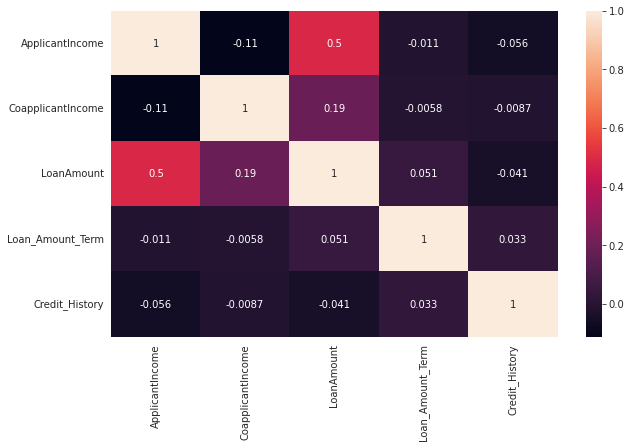

In [ ]:
## Co-relation matrix
fig,ax = plt.subplots(figsize = (10,6))
corr = df_train.corr()
sns.heatmap(corr,annot=True)

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Loan_ID,Loan_ID,0.0
Gender,Gender,0.0
Married,Married,0.0
Dependents,Dependents,0.0
Education,Education,0.0
Self_Employed,Self_Employed,0.0
ApplicantIncome,ApplicantIncome,0.0
CoapplicantIncome,CoapplicantIncome,0.0
LoanAmount,LoanAmount,0.0
Loan_Amount_Term,Loan_Amount_Term,0.0
